In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,SVR,LinearSVC,LinearSVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_percentage_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
df = pd.read_csv('bc2.csv')
df.head()


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [29]:
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [30]:
df.drop("ID",axis = 1,inplace = True)   # Removing unrelated column

In [31]:
col = df.columns
p = df["Bare Nuclei"][df["Bare Nuclei"] =='?']        #  Saving unknow value for further check replaced or not
p

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [32]:
df["Bare Nuclei"][df["Bare Nuclei"] =='?'] = np.nan   # Replacing ? Value to null value

In [33]:
impute = IterativeImputer(SVR(),max_iter=10)        # Iterative method for null value filling


In [34]:
df = pd.DataFrame(impute.fit_transform(df))      # fitting imputer for our data
df.columns = col  

In [35]:
df.iloc[p.index]     # checing replace values 

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8.0,4.0,5.0,1.0,2.0,7.392639,7.0,3.0,1.0,4.0
40,6.0,6.0,6.0,9.0,6.0,9.398159,7.0,8.0,1.0,2.0
139,1.0,1.0,1.0,1.0,1.0,1.042239,2.0,1.0,1.0,2.0
145,1.0,1.0,3.0,1.0,2.0,1.071572,2.0,1.0,1.0,2.0
158,1.0,1.0,2.0,1.0,3.0,1.144917,1.0,1.0,1.0,2.0
164,5.0,1.0,1.0,1.0,2.0,1.100102,3.0,1.0,1.0,2.0
235,3.0,1.0,4.0,1.0,2.0,1.432843,3.0,1.0,1.0,2.0
249,3.0,1.0,1.0,1.0,2.0,0.994742,3.0,1.0,1.0,2.0
275,3.0,1.0,3.0,1.0,2.0,0.934399,2.0,1.0,1.0,2.0
292,8.0,8.0,8.0,1.0,2.0,6.372142,6.0,10.0,1.0,4.0


In [36]:
for i in df.columns:
    print(df[i].unique(),i)    # Finding Unique value of Each columns

[ 5.  3.  6.  4.  8.  1.  2.  7. 10.  9.] ClumpThickness
[ 1.  4.  8. 10.  2.  3.  7.  5.  6.  9.] Cell Size
[ 1.  4.  8. 10.  2.  3.  5.  6.  7.  9.] Cell Shape
[ 1.  5.  3.  8. 10.  4.  6.  2.  9.  7.] Marginal Adhesion
[ 2.  7.  3.  1.  6.  4.  5.  8. 10.  9.] Single Epithelial Cell Size
[ 1.         10.          2.          4.          3.          9.
  7.          7.39263871  5.          9.39815948  8.          6.
  1.04223929  1.07157173  1.14491662  1.10010164  1.43284282  0.99474155
  0.93439886  6.37214215  1.02391206  2.10823784  7.28055621  1.13446902] Bare Nuclei
[ 3.  9.  1.  2.  4.  5.  7.  8.  6. 10.] Normal Nucleoli
[ 1.  2.  7.  4.  5.  3. 10.  6.  9.  8.] Bland Chromatin
[ 1.  5.  4.  2.  3.  7. 10.  8.  6.] Mitoses
[2. 4.] Class


In [37]:
df["Bare Nuclei"][df["Bare Nuclei"]=="?"]= np.nan

In [38]:
df.apply(lambda x:x.fillna(x.median(),inplace = True) )
df["Bare Nuclei"].astype("int64")

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: int64

In [39]:
# df["Bare Nuclei"][df["Bare Nuclei"]=="?"].index

In [40]:
# df['Bare Nuclei']=df['Bare Nuclei'].fillna(method="ffill")

In [41]:
# df['Bare Nuclei']=df['Bare Nuclei'].astype("int64")

In [42]:
# plt.subplot(5,6,1)
# sns.pairplot(df,diag_kind="kde",corner = True);

In [17]:
X = df.drop("Class",axis = 1)
y =df["Class"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [19]:
poly = PolynomialFeatures(degree=2,interaction_only=True)

In [20]:
X_train=pd.DataFrame(poly.fit_transform(X_train))

In [21]:
svc1 = SVC()

parameter = {"kernel":['linear', 'rbf', 'sigmoid'],"gamma" : ['scale', 'auto']}

In [46]:
# Doing Hypertuning and finding best parameter and best Cross validation value.
cv_score = 0
for i  in range(20):
    CV = RandomizedSearchCV(svc,parameter,random_state=1,cv=i+2)
    CV.fit(X_train,y_train)
    if cv_score<CV.best_score_:
        cv_score = CV.best_score_
        print(f"CV = {i}, model score for CV {CV.best_score_}, best parameter {CV.best_params_}")

CV = 0, model score for CV 0.9512479474548441, best parameter {'kernel': 'rbf', 'gamma': 'scale'}
CV = 1, model score for CV 0.9512967875036841, best parameter {'kernel': 'rbf', 'gamma': 'scale'}
CV = 2, model score for CV 0.951312695924765, best parameter {'kernel': 'rbf', 'gamma': 'scale'}
CV = 3, model score for CV 0.9598343685300208, best parameter {'kernel': 'rbf', 'gamma': 'scale'}
CV = 8, model score for CV 0.9599159663865546, best parameter {'kernel': 'rbf', 'gamma': 'scale'}
CV = 13, model score for CV 0.960144927536232, best parameter {'kernel': 'rbf', 'gamma': 'scale'}


In [47]:
# Doing Hypertuning and finding best parameter and best Cross validation value.
svc2 = LinearSVC()
para2 = {'loss' : ['hinge', 'squared_hinge'],'penalty' : ['l1', 'l2'],'multi_class' :['ovr', 'crammer_singer']}
cv_score = 0
for i  in range(20):
    CV = RandomizedSearchCV(svc2,para2,random_state=1,cv=i+2)
    CV.fit(X_train,y_train)
    if cv_score<CV.best_score_:
        cv_score = CV.best_score_
        print(f"CV = {i}, model score for CV {CV.best_score_}, best parameter {CV.best_params_}")

CV = 0, model score for CV 0.9341050903119869, best parameter {'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}


In [ ]:
CV = RandomizedSearchCV(svc,parameter,random_state=1,cv=46)
CV.fit(X_train,y_train)

In [43]:
print(CV.best_score_)
print(CV.best_params_)

0.959733893557423
{'kernel': 'rbf', 'gamma': 'scale'}


Ckecking other model accuracy


In [78]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [84]:
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.8321267186438173

In [85]:
cv_score = 0
for i  in range(20):
    CV = GridSearchCV(svc,parameter,cv=i+2)
    CV.fit(X_train,y_train)
    if cv_score<CV.best_score_:
        cv_score = CV.best_score_
        print(f"CV = {i}, model score for CV {CV.best_score_}, best parameter {CV.best_params_}")

CV = 0, model score for CV 0.9541215106732348, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 1, model score for CV 0.9541703507220749, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 2, model score for CV 0.9541862591431558, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 3, model score for CV 0.9626915113871636, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 10, model score for CV 0.9627394636015324, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 11, model score for CV 0.9627438088976551, best parameter {'gamma': 'scale', 'kernel': 'rbf'}
CV = 13, model score for CV 0.9630434782608697, best parameter {'gamma': 'scale', 'kernel': 'rbf'}


In [86]:
sv = SVC(kernel = "linear",gamma = "scale",random_state = 1)
sv.fit(X_train,y_train)
print(sv.score(X_train,y_train))
sv.score(X_test,y_test)

0.9656160458452722


0.9828571428571429

# New project

In [19]:
data = pd.read_csv('Advertising.csv',index_col=0)

In [20]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

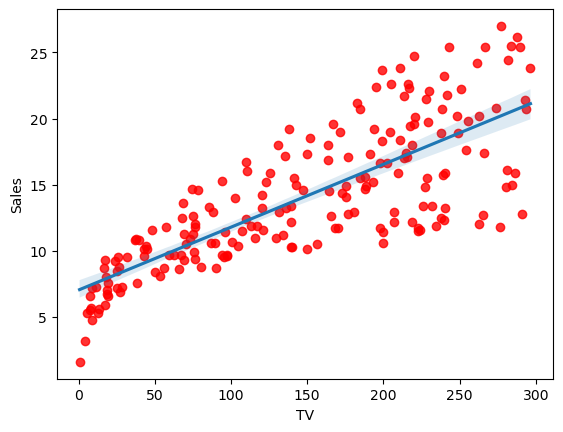

In [21]:
sns.regplot(data.TV,data.Sales,order=1,scatter_kws = {"color":"r"})

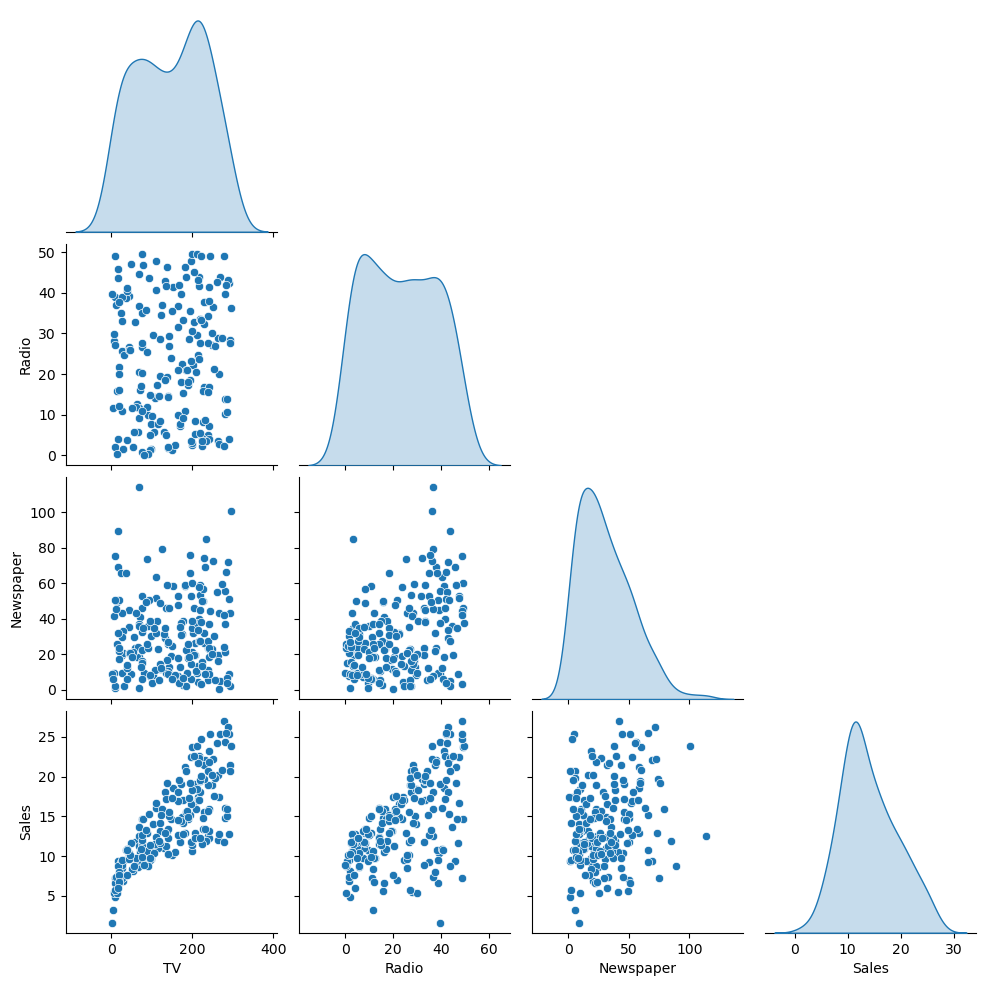

In [22]:
sns.pairplot(data,diag_kind="kde",corner=True)

In [23]:
X = data.drop("Sales",axis = 1)
y = data["Sales"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,TV,Radio,Newspaper
43,293.6,27.7,1.8
190,18.7,12.1,23.4
91,134.3,4.9,9.3
137,25.6,39.0,9.3
52,100.4,9.6,3.6


In [25]:
from sklearn.svm import SVC,SVR

In [26]:
Sv = SVR(kernel="linear")
Sv.fit(X_train,y_train)

SVR(kernel='linear')

In [27]:
Sv.score(X_train,y_train)

0.9020019742901862

In [28]:
Sv.score(X_test,y_test)

0.8322319454919381

In [37]:
Sv = SVR()
para = {"kernel": ['linear', 'poly'],"gamma":["scale"]}
cv = RandomizedSearchCV(Sv,para,random_state=1,cv=2)
cv.fit(X_train,y_train)
print(f"For best cv= , best score is {cv.best_score_}, for that best para is {cv.best_params_}")

For best cv= , best score is 0.8958600352695749, for that best para is {'kernel': 'linear', 'gamma': 'scale'}
